In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df_contaminantes = pd.read_csv('contaminates_por_mes.csv')

In [5]:
df_contaminantes.head()

,fecha,arsenico,benpirenos,cadmio,niquel
0,2008-01-31,1.445264,0.281087,0.768682,6.056367
1,2008-02-29,1.270137,0.215056,0.751601,5.974355
2,2008-03-31,1.093210,0.120814,0.556587,4.933656
3,2008-04-30,1.265506,0.073814,0.658350,4.354272
4,2008-05-31,1.218206,0.063008,0.852267,5.091518


In [7]:
df_contaminantes['fecha'] = pd.to_datetime(df_contaminantes['fecha'])

In [8]:
df_contaminantes.dtypes

fecha         datetime64[ns]
arsenico             float64
benpirenos           float64
cadmio               float64
niquel               float64
dtype: object

In [9]:
df_contaminantes = df_contaminantes.set_index('fecha')

In [10]:
df_contaminantes.head()

,arsenico,benpirenos,cadmio,niquel
fecha,,,,
2008-01-31,1.445264,0.281087,0.768682,6.056367
2008-02-29,1.270137,0.215056,0.751601,5.974355
2008-03-31,1.093210,0.120814,0.556587,4.933656
2008-04-30,1.265506,0.073814,0.658350,4.354272
2008-05-31,1.218206,0.063008,0.852267,5.091518


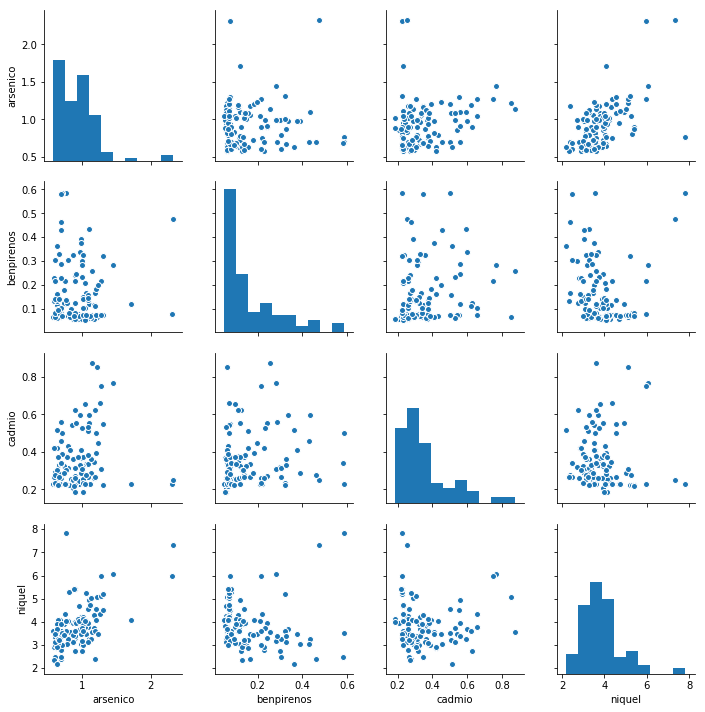

In [11]:
sns.pairplot(df_contaminantes)

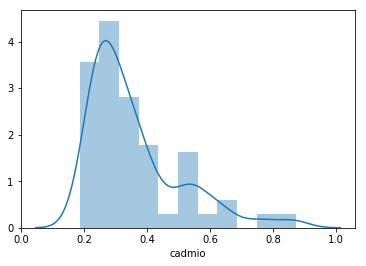

In [12]:
sns.distplot(df_contaminantes['cadmio'])

In [13]:
df_contaminantes.corr()

,arsenico,benpirenos,cadmio,niquel
arsenico,1.000000,0.004295,0.190502,0.568442
benpirenos,0.004295,1.000000,0.152375,-0.045154
cadmio,0.190502,0.152375,1.000000,0.009386
niquel,0.568442,-0.045154,0.009386,1.000000


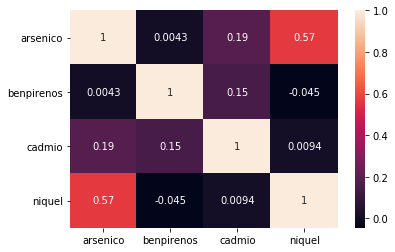

In [14]:
sns.heatmap(df_contaminantes.corr(), annot=True)